In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("Droop_and_Voltage_Response.csv")

In [ ]:
features = ["PCN1", "PCN2", "PCN3", "PCN4", "PCN5", "L1", "L2", "L3", "L4", "L5"]
targets = ["Droop1", "Droop2", "Droop3", "Droop4", "Droop5"]

In [ ]:
X = data[features]
y = data[targets]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {}
results = {}

In [2]:
for target in targets:
    print(f"Training Random Forest model for {target}...")
    y_train_target = y_train[target]
    y_test_target = y_test[target]

    model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    model.fit(X_train, y_train_target)

    models[target] = model

    y_pred = model.predict(X_test)


    mse = mean_squared_error(y_test_target, y_pred)
    r2 = r2_score(y_test_target, y_pred)

  
    results[target] = {
        "MSE": mse,
        "R^2": r2,
        "Predictions": y_pred,
    }
    
    print(f"{target} - MSE: {mse:.4f}, R^2: {r2:.4f}")


Training Random Forest model for Droop1...
Droop1 - MSE: 0.0221, R^2: 0.9340
Training Random Forest model for Droop2...
Droop2 - MSE: 0.0128, R^2: 0.8476
Training Random Forest model for Droop3...
Droop3 - MSE: 0.0086, R^2: 0.8667
Training Random Forest model for Droop4...
Droop4 - MSE: 0.0261, R^2: 0.8856
Training Random Forest model for Droop5...
Droop5 - MSE: 0.0112, R^2: 0.8346


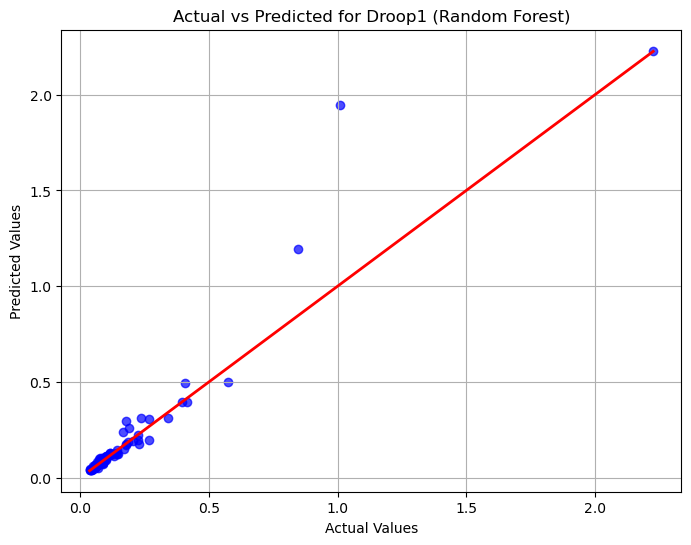

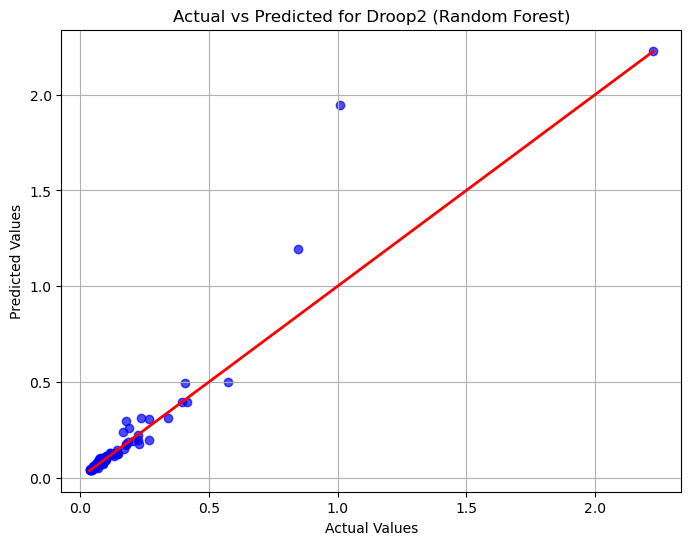

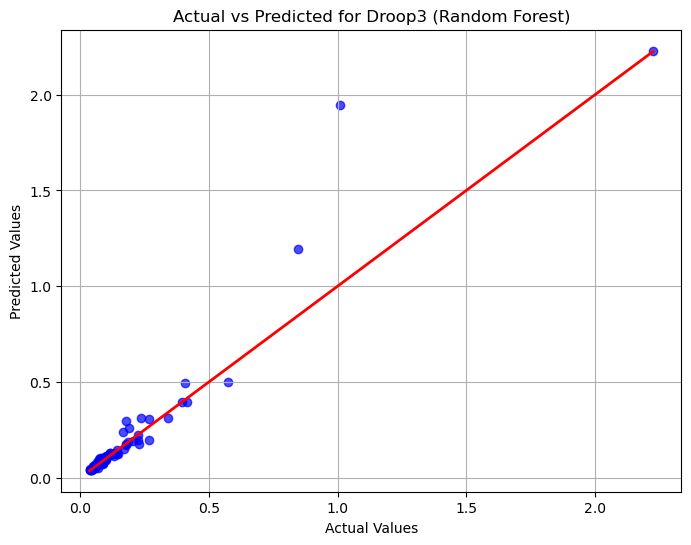

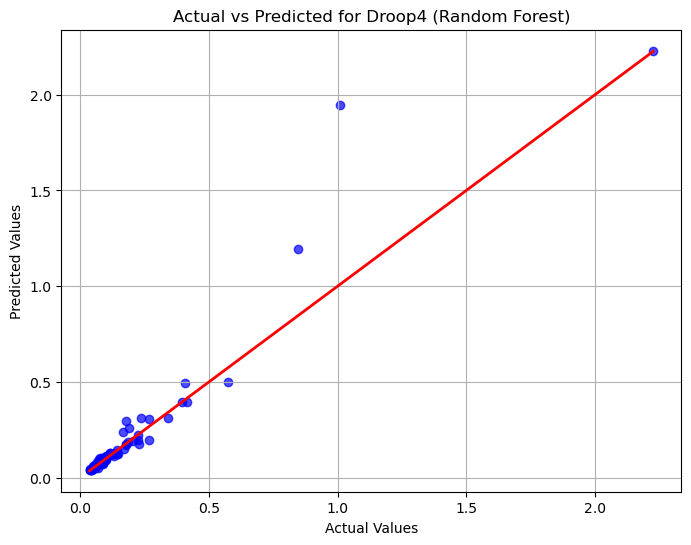

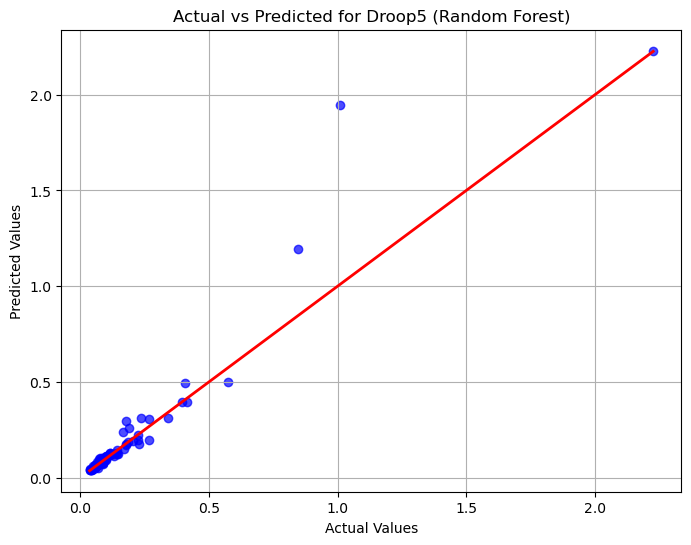

In [4]:
for target in targets:
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_target, y_pred, alpha=0.7, color='blue')
    plt.plot([y_test_target.min(), y_test_target.max()], [y_test_target.min(), y_test_target.max()], color='red', lw=2)
    plt.title(f"Actual vs Predicted for {target} (Random Forest)")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.show()